# Analize de dados da taxa de suicidio no Brasil entre 1985 ~ 2016




###Referencias:

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

Data analize from kaggle:
https://www.kaggle.com/code/patrickgomes/suicide-rate-in-brazil-exploratory-data-analysis

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

 De Vares S. F, (2007). The suicide problem in Émile Durkheim

 Carlson, Elwood (2008). The Lucky Few: Between the Greatest Generation and the Baby Boom.

 Time Magazine (1951). "The Younger Generation"

 Dimock, Michael (2019). Defining generations: Where Millennials end and Generation Z begins ». Pew Research Center.

 Willetts, David (2010). The Pinch: How the Baby Boomers Took their Children's Future and How They Can Give it Back, Atlantic.

 Brokaw, Tom (1998). The Greatest Generation, Random House.

 Sam Savage (2006). The Generation Z Connection: Teaching Information Literacy to the Newest Net Generation

###Inspiração
Prevenir suicidios

# Introdução


Suicidio é definido com "pôr termo à própria vida; matar-se.", Acredito eu que, a principal intenção de um suicidio não seja deixar de viver e sim para de sentir algo que incomoda muito.

Recentemente, no Brasil em 2015, foi criado o "Setembro Amarelo" que visa conscientizar as pessoas sobre o suicídio, bem como evitar o seu acontecimento. Porem mesmo assim as taxas de suicidio continuam aumentando. 

Esse nootbook tenta mostra como a tecnologia pode ajudar a combater suicidios além de analizar dados da OMS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_style("dark")

In [ ]:
color_gender = ['#F781D8', '#819FF7']

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Davi-ldc/machine-learnig/master/dataDL/suicidio.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Dicionario dos dados

**Country**: Representa os paises (texto)

**Year**: Ano (inteiro)

**Sex**: representa o sexo (texto)

**Age**: Idade (texto)

**Suicides_no**: numero de suicidios (inteiro)

**Population**: Poupulação do local (inteiro)

**Suicides / 100k pop**: representa o numero de suicidios por 100 mil abitantes (decimal)

**Country-year**: Ano e o pais (texto)

**HDI for year**: Índice de Desenvolvimento Humano por ano(decimal)

**Gdp_for_year($)**: PIB por ano (texto)

**Gdp_per_capita($)**: renda per capta (decimal)

**Generation**: A geração (texto)


In [ ]:
df_brazil = df[df['country']=='Brazil'].copy()
df_brazil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Verifica dados faltantes

In [ ]:
print('Mundo------------')
display(df.isnull().sum())
print('Brasil----------')
display(df_brazil.isnull().sum())


Mundo------------


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Brasil----------


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

## Media da taxa de suicidio no Brasil X Mundo

---


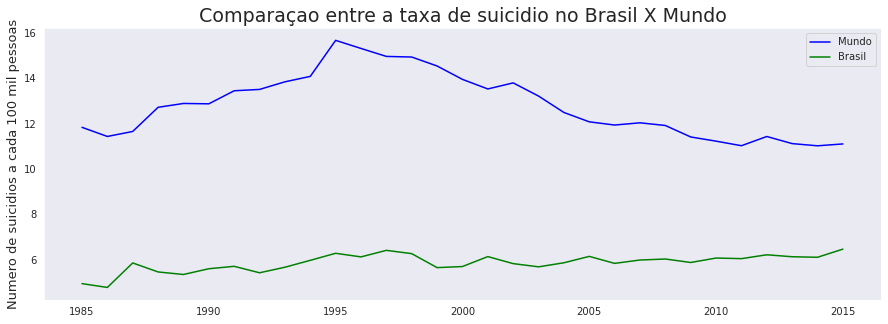

In [ ]:
ages = df_brazil.year.unique()
suicide_brazil_avg = df_brazil.groupby('year')['suicides/100k pop'].mean()
suicide_world_avg = df.groupby('year')['suicides/100k pop'].mean()
gdp_avg_world = df.groupby('year')['gdp_per_capita ($)'].mean()
gdp_avg_brazil = df_brazil.groupby('year')['gdp_per_capita ($)'].mean()

suicide_world_avg.drop(2016, inplace=True)


fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=ages,y=suicide_world_avg, label='Mundo', color='blue')
ax = sns.lineplot(x=ages, y = suicide_brazil_avg, label='Brasil', color='green')
plt.title('Comparaçao entre a taxa de suicidio no Brasil X Mundo', fontsize=19)
plt.ylabel('Numero de suicidios a cada 100 mil pessoas',fontsize=13);

A taxa média de suicídio no Brasil vem aumentando. Ela foi de **59,18 por 100.000** habitantes em 1985 para **77,45 por 100.000 habitantes** em 2015, crescendo **31%,** uma média de **1%** ao ano.

Por outro lado, a taxa global de suicídio vem diminuindo ao longo do tempo, mas a tendencia é que ela volte a subir, de acordo com a Organização Pan-Americana da Saúde **uma a cada 100 mortes acorre por suicidio.**


## Idade

---


In [ ]:
tabela = pd.pivot_table(df_brazil, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '+75 years']
tabela = tabela.reindex(column_order, axis=1)
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,NaN
1986,31.0,508.0,505.5,651.0,372.0,NaN
1987,33.5,502.0,565.5,724.5,422.0,NaN
1988,30.0,472.0,557.5,724.0,356.0,NaN
1989,31.5,491.5,569.0,692.5,354.5,NaN


In [ ]:
tabela2 = pd.pivot_table(df_brazil, values ='suicides/100k pop',index=['year'],columns=['sex'])
tabela2.head()

sex,female,male
year,,
1985,2.180000,7.683333
1986,2.226667,7.300000
1987,2.220000,9.466667
1988,2.458333,8.435000
1989,2.168333,8.501667


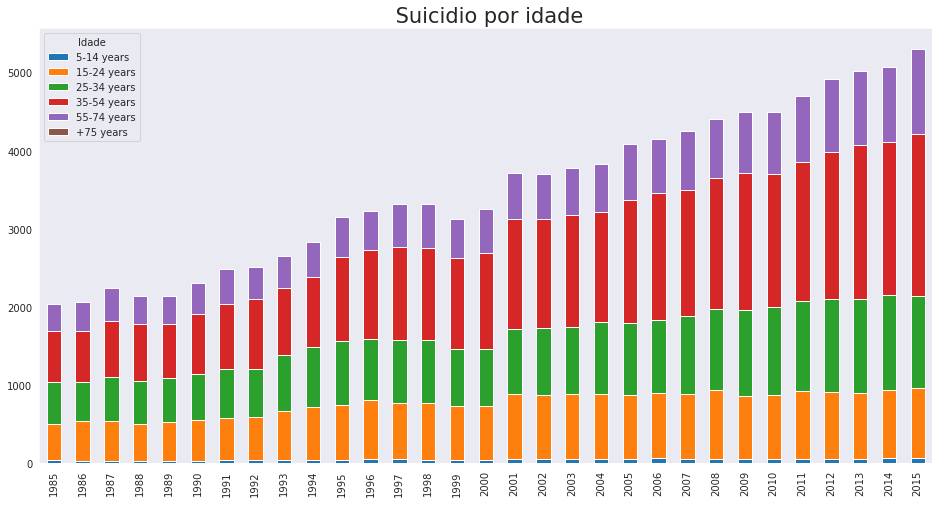

In [ ]:
tabela.plot.bar(stacked=True,figsize=(16,8))
plt.legend(title='Idade')
plt.xlabel(' ')
plt.title(' Suicidio por idade',fontsize=21);

Os gruos que mais cometem suicidios são 35-54, 25-34, 15-24, porem é importante resaltar que as gerações mais antigas ja estão na terra a muito mais tempo que a geração Z e tem uma taxa de crescimento de suicidio muito menor do que a da geração Z

In [ ]:
df_brazil['generation'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Generation X       88
Silent             82
Millenials         72
Boomers            68
G.I. Generation    44
Generation Z       18
Name: generation, dtype: int64>

## Sobre gerações

**Geração X**: Geração X é uma expressão que se refere à geração nascida após a Segunda Guerra Mundial. Embora não haja acordo sobre o período que abrange, geralmente inclui pessoas nascidas entre a década de 1960 e o final da década de 1970.

**Silencioso**: Geração Silenciosa é um termo utilizado para se referir à população nascida entre 1925 e 1942, nomeadamente durante a Grande Depressão e a Segunda Guerra Mundial.

**Millennials**: Geração Y, também chamada de geração millennial, geração internet ou millennials é um conceito da Sociologia que se refere à corte dos nascidos após o início dos anos 1980 até, aproximadamente, o final do século. Alguns autores consideram até 2005.

**Boomers**: boomers dá nome à geração de pessoas nascidas entre os anos de 1946 e 1964. A expressão pode ser traduzida livremente como "baby boom".

**Geração GI**: Greatest generation é uma expressão cunhada pelo jornalista e escritor Tom Brokaw, em seu livro The Greatest Generation, para se referir à geração formada por indivíduos que cresceram durante a Grande Depressão ( 1929–39) nos Estados Unidos e posteriormente participou dos combates da Segunda Guerra Mundial (1939–45, com participação dos EUA entre 1941 e 1945), bem como por aqueles que, permanecendo no país, participaram da guerra esforço na chamada frente doméstica.

**Geração Z**: A Geração Z é a definição sociológica para a geração de pessoas nascidas, em média, entre a segunda metade da década de 1990 até o início de 2010. A teoria mais aceita pelos estudiosos é que ela surgiu como uma sucessão de Geração Y, do final de 1982 (início do Echo Boom). Portanto, é a geração que corresponde à idealização e nascimento da World Wide Web, criada em 1990 por Tim Berners-Lee, e no “boom” da criação de dispositivos tecnológicos modernos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


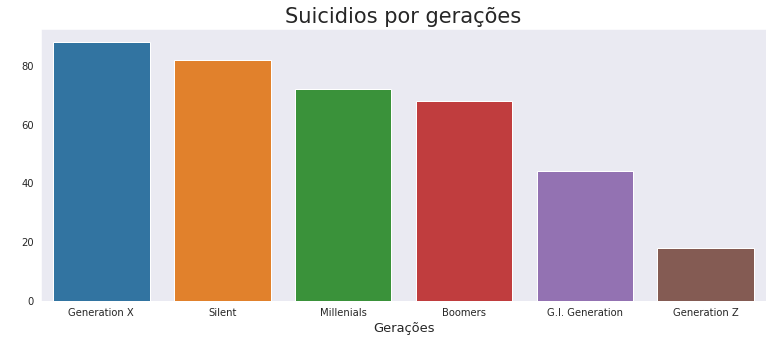

In [ ]:
fig = plt.figure(figsize=(13,5))
sns.countplot('generation', order = df_brazil['generation'].value_counts().index, data = df_brazil)
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Suicidios por gerações',fontsize=21);

A faixa etária com maior número de suicídios foi de 35 a 54 anos, com 39.930 (**36,70%**), seguida de 25 a 34 anos 26.267 de 25 a 34 anos (**24,14%**).


A Geração com maior número de suicídios registrados foi a Geração X (**23,65%**), seguida da Geração Silenciosa (**22,04%**).

A tendencia é que com o passar do tempo a geração Z vá para o primeiro lugar do rank.

## Sexo

---



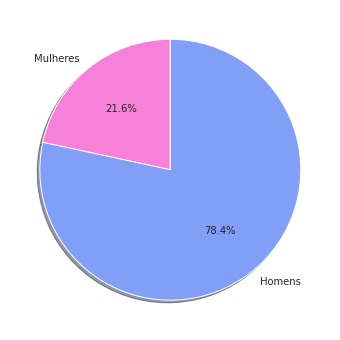

In [ ]:
genders = df_brazil.groupby('sex').suicides_no.sum() / df_brazil.groupby('sex').suicides_no.sum().sum()

fig = plt.figure(figsize=(6,6))
plt.pie(genders, labels=['Mulheres', 'Homens'], colors = color_gender, autopct='%1.1f%%', shadow = True, startangle=90);

Homens comtem *3.6** suicidios a mais que as e mulheres.

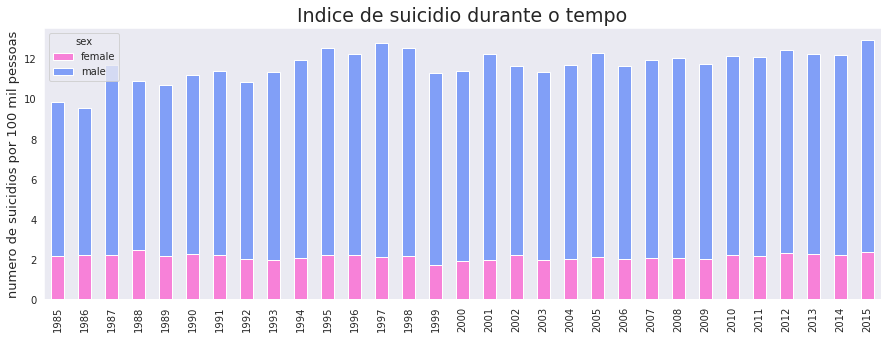

In [ ]:
tabela2.plot.bar(stacked=True, figsize=(15,5), color=color_gender)
plt.xlabel(' ')
plt.title('Indice de suicidio durante o tempo', fontsize=19)
plt.ylabel('numero de suicidios por 100 mil pessoas', fontsize=13);

Deixa os dados na mesma escala para ficar mais visivel a diferença entre sexos

In [ ]:

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(tabela2)
tabela2_normal = pd.DataFrame(np_scaled, columns=['Mulheres', 'Homens'], index=tabela2.index)
tabela2_normal.head()

,Mulheres,Homens
year,,
1985,0.637744,0.112250
1986,0.698482,0.000000
1987,0.689805,0.634456
1988,1.000000,0.332357
1989,0.622560,0.351879


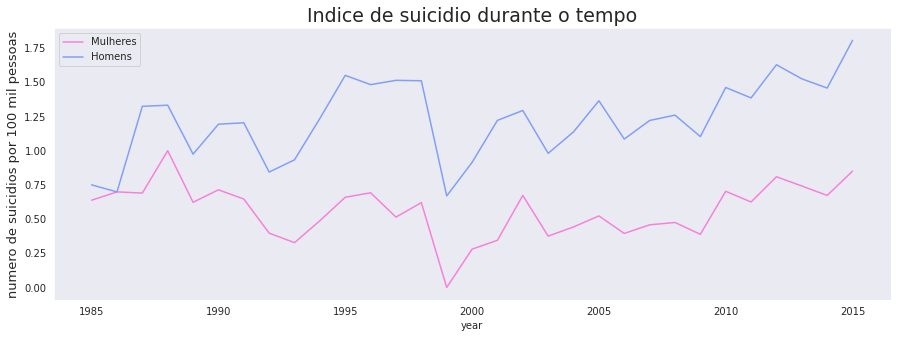

In [ ]:
tabela2_normal.plot(stacked=True, figsize=(15,5), color=color_gender)

plt.title('Indice de suicidio durante o tempo', fontsize=19)
plt.ylabel('numero de suicidios por 100 mil pessoas', fontsize=13);

## Idade e Sexo

In [ ]:
women = df.groupby(['sex', 'age'])['suicides_no'].sum()[:6] # gender and age --> Number of suicides --> add and get the first 6
men = df.groupby(['sex', 'age'])['suicides_no'].sum()[6:] # gender and age --> Number of suicides --> add and get the last 6
w = [] # Women
m = [] # Men
wn = [] # Number of women
mn = [] # Number of men
for i in range(6):
  w.append(women.index[i][1].split(' ')[0])
  m.append(men.index[i][1].split(' ')[0])
  wn.append(women[i])
  mn.append(men[i])


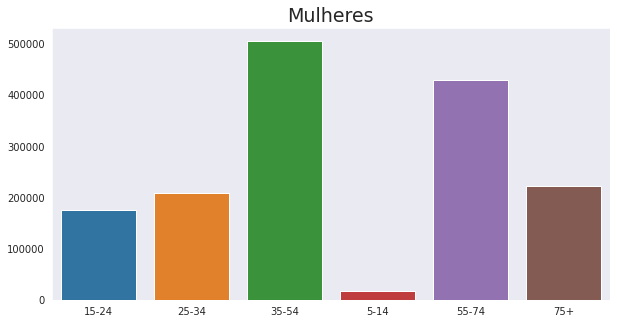

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=w, y = wn, data=df_brazil)
plt.title('Mulheres', fontsize=19);

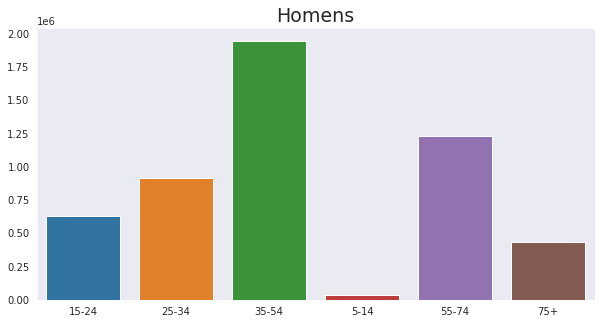

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=m, y = mn, data=df_brazil);
plt.title('Homens', fontsize=19);

In [ ]:
print(f'''
Total de suicidos cometidos por Homens: {sum(mn)}
Total de suicidos cometidos por Mulheres: {sum(wn)}
''')


Total de suicidos cometidos por Homens: 5188910
Total de suicidos cometidos por Mulheres: 1559510



##Economia
---
As variaveis ultilizadas são **Produto interno bruto, Renda per capta e Índice de Desenvolvimento Humano **


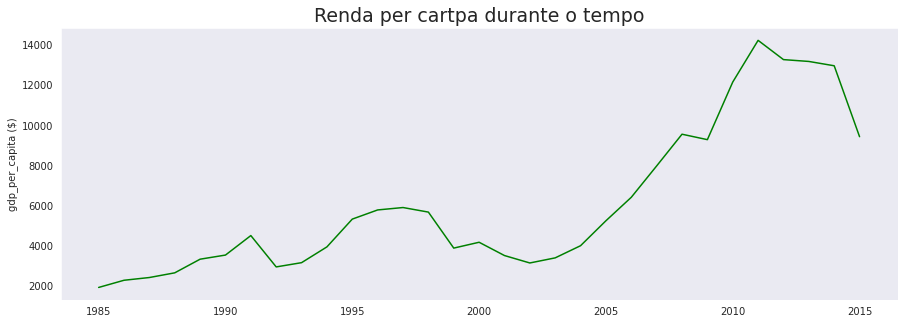

In [ ]:

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=ages,y=gdp_avg_brazil, color = 'green')
plt.title('Renda per cartpa durante o tempo',fontsize=19);

Text(0.5, 1.0, 'Suicidio por 100 mil abitantes')

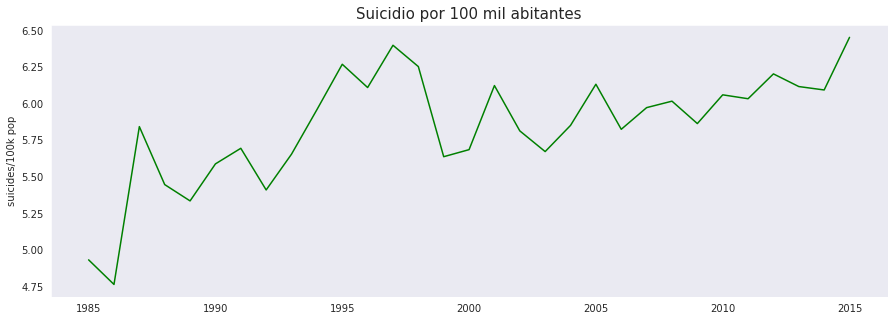

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(x=ages, y =suicide_brazil_avg, color = 'green')
plt.title('Suicidio por 100 mil abitantes', fontsize=15)


Mesmo com a renda per capta aumentando o indice de suicidio continua aumentando, o que mostra que a renda n faz tanta diferença, tanto que de acordo com o grafico abaixo a correlação entre a (renda e o IDH) e o numero d suicidios é baixa (se a correlação fosse alta, caso o numero de suicidios aumentasse a renda e o idh aumentariam tmb)

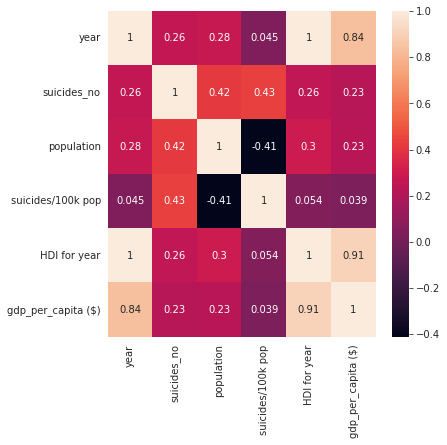

In [ ]:
grafico_corelação = plt.figure(figsize=(6, 6))
sns.heatmap(df_brazil.corr(), annot=True)
plt.show()


#Numero de suicidios por ano

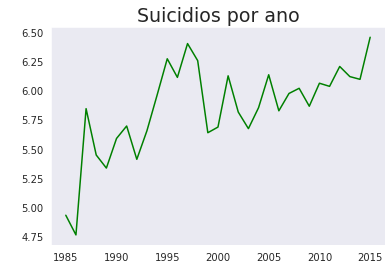

In [ ]:
sns.lineplot(x=ages, y =suicide_brazil_avg, color = 'green')
plt.title('Suicidios por ano', fontsize=19)
plt.ylabel(' ');

Com esse ultimo grafico podemos perceber que, mesmo com campanhas como stembro amarelo,**o numero de suicidios vem aumentando constantemente** 

#Conclusão
Temas como suicidio nos ajudam a entender a relação das pessoas com suas vidas, alem de levarem ao questionamento **"Qual o valor da vida?"**. Analisar a tendência global e nacional é muito diferente de entender o que faz uma pessoa cometer suicídio, não são apenas os dados que nos dizem algo, não são apenas os numeros que nos contam histórias. Por trás de todo suicidio tem uma historia unica, que na maioria das vezes não foi ouvida.


Além disso gostaria de deixar claro de que não é possivel montar um modelo de machine learnig pare medir a tendencia de alguem cometer suicidio devido a falta de dados e da especificidade dos casos de suicido e do dificil acesso a eles. 

Como as redes sociais ajudam a fortalercer a depressão seria possivel que grandes empresas como o meta tenham entre os seus "Perfis de pessoas" um dedicado a quem está triste (não com depressão, triste) e ao invez de usar o tempo em que a pessoa fica na rede para penalizar e recompensar o algoritimo poderia ser usado o possivel estado emocional dela. O que resolveria o maior problema de quem quer ajudar suicidas (ir até a pessoa ao invez de esperar ela pedir ajuda).

Mas não gera tanto lucro quanto manter alguem 10 hrs no instragram, em uma "bolha", achando que a vida dele é horrivel e a dos outros incrivel, o que nos leva a outra questão ***O dinheiro vale mais que a vida?***.



#Conclusão dos dados
Taxas de suicídio:

A taxa de suicídio no Brasil continuou aumentando (1,03% ao ano). A taxa de suicídio no mundo vem diminuindo desde 1995 (4,26% ao ano) Principais vítimas:

Homens (78,4%) 

Faixa etária 35-54 anos (36,70%)

Geração X, 1960 - 1979 (23,65%)

Para o futuro a tendencia seria 15-24 anos, e a geração mais afeta será a Z.

###Justificativa:
a geração X tem mais casos de suicidios devido ao fato deles terem vivido mais, enquanto a geração z tem 15 anos de vida a X tem 50 e mesmo assim ja superou a geração silenciosa que viveu mais tempo que ele, a tendencia é que daqui a 20 anos isso se repita com a geração Z passando a X.
